<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning-with-PyTorch/blob/main/Dataset_and_dataLoader(pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# upload kaggle json file

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minhaz1172","key":"c20c43ca9e6e5be6fa69c912fab503c3"}'}

# Move and Set permission

In [2]:
import os
import zipfile

# Make directory and move kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json

# install kaggle package

In [3]:
!pip install -q kaggle

# install dataset

In [4]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 192MB/s]


# unzip the dataset

In [5]:
# 3. Unzip the file using its actual filename
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# import necessary Liabraries

In [6]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# load the dataset

In [8]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.shape

(569, 33)

# drop useless columns

In [11]:
df=df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# select features and Labels

In [14]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [15]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


# Normalize the features

# preprocessing the Labels

In [17]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# Split the dataset for training and testing

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
X_train.shape

(455, 30)

In [20]:
X_test.shape

(114, 30)

# Preprocessing Xtrain and Xtest

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
X_train.shape

(455, 30)

In [23]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

# Convert Numpy array to Tensor

In [25]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)

In [26]:
X_train_tensor

tensor([[-1.4408, -0.4353, -1.3621,  ...,  0.9320,  2.0972,  1.8865],
        [ 1.9741,  1.7330,  2.0917,  ...,  2.6989,  1.8912,  2.4978],
        [-1.4000, -1.2496, -1.3452,  ..., -0.9702,  0.5976,  0.0579],
        ...,
        [ 0.0488, -0.5550, -0.0651,  ..., -1.2390, -0.7086, -1.2715],
        [-0.0390,  0.1021, -0.0314,  ...,  1.0500,  0.4343,  1.2134],
        [-0.5486,  0.3133, -0.6035,  ..., -0.6110, -0.3345, -0.8463]])

**Dataset And DataLoader working**

# Create A Custom Dataset

In [29]:
from torch.utils.data import Dataset,DataLoader
class BreastCancerDataset(Dataset):
  def __init__(self,features,labels):
    self.features=features
    self.labels=labels

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

# Create Dataset Object

In [30]:
train_dataset=BreastCancerDataset(X_train_tensor,y_train_tensor)
test_dataset=BreastCancerDataset(X_test_tensor,y_test_tensor)

# Create DataLoader

In [31]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [32]:
X_train.shape[1]

30

# Define the NEURAL Network

In [38]:
import torch.nn as nn

class CancerClaasifer(nn.Module):  # Optional: fix typo to CancerClassifier
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):  # ✅ Now it's outside __init__ (correct)
        return self.layers(x)

input_dim = X_train.shape[1]
model = CancerClaasifer(input_dim)


# LOSS FUNCTION AND Optimizer update

In [39]:
import torch.optim as optim
criterion=nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


# Training Loop

In [44]:
num_eposchs=100
loss_historry=[]
for epoch in range(num_eposchs):
  for features,labels in train_loader:
    y_pred=model(features).squeeze()
     # squeeze() only removes dimensions with size 1. If the shape is [32, 10], it will do nothing.

    loss=criterion(y_pred.squeeze(),labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print the loss of every 10 epochs to monitor trainig progress
    if (epoch+1)%10==0:
      print(f'Epoch [{epoch+1}/{num_eposchs}], Loss: {loss.item():.4f}')
    if(epoch+1)%10==0:
      loss_historry.append(loss.item())


Epoch [10/100], Loss: 0.0006
Epoch [10/100], Loss: 0.0003
Epoch [10/100], Loss: 0.0010
Epoch [10/100], Loss: 0.0004
Epoch [10/100], Loss: 0.0006
Epoch [10/100], Loss: 0.0002
Epoch [10/100], Loss: 0.0002
Epoch [10/100], Loss: 0.0009
Epoch [10/100], Loss: 0.0001
Epoch [10/100], Loss: 0.0001
Epoch [10/100], Loss: 0.0003
Epoch [10/100], Loss: 0.0007
Epoch [10/100], Loss: 0.0001
Epoch [10/100], Loss: 0.0014
Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0004
Epoch [20/100], Loss: 0.0012
Epoch [20/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0010
Epoch [20/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0004
Epoch [20/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0008
Epoch [20/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0003
Epoch [20/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0001
Epoch [20/100], Loss: 0.0006
Epoch [30/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0001
Epoch [30/100], Loss: 0.0005
Epoch [30/100], Loss: 0.0001
Epoch [30/100]

# Evaluation on test Data

In [45]:
model.eval()

with torch.no_grad():
  for features,labels in test_loader:
    y_pred=model(features).squeeze()
    predicted=y_pred.round()
    accuracy=(predicted ==labels).sum().item()/len(labels)
    print(f"Accuracy: {accuracy*100:.2f}%")



Accuracy: 96.88%
Accuracy: 100.00%
Accuracy: 93.75%
Accuracy: 100.00%


# plot the loss curve

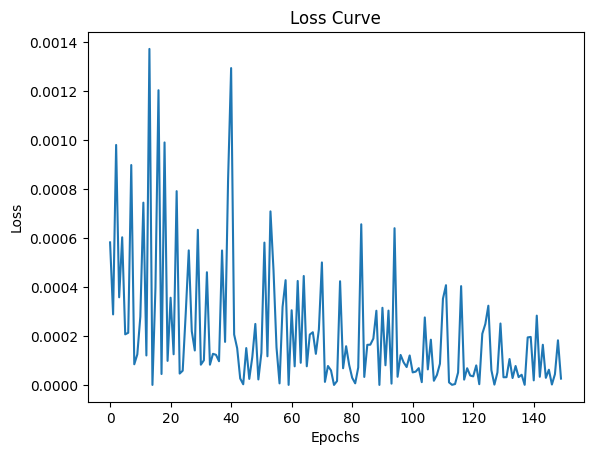

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

epochs_recorded=[(1+)]
plt.plot(loss_historry)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()